Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Homeless Encampments



Import Libraries & get url


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline




## Set Display Column with wider so no problem with Media URL series

In [2]:
pd.options.display.max_colwidth=115

## Setup to display images - working, work to do

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display

### get url

In [4]:

#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'
url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'

In [5]:
df = pd.read_csv(url)


In [6]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6603123,12/06/2016 11:35:17 PM,NaN,12/06/2016 11:35:17 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of BROADWAY and KEARNY ST,3.0,North Beach,"(37.7980170014162, -122.405473132817)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5847bbab3da19793c74c16fb/report.jpg
1,6603050,12/06/2016 10:16:53 PM,NaN,12/06/2016 10:16:53 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"533 DUBOCE AVE, SAN FRANCISCO, CA, 94117",8.0,Duboce Triangle,"(37.76913077227, -122.432044051411)",Web Self Service,NaN
2,6603027,12/06/2016 09:57:45 PM,NaN,12/06/2016 10:37:35 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"2222 17TH ST, SAN FRANCISCO, CA, 94103",10.0,Potrero Hill,"(37.76468222906, -122.405953993283)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5847a4d03da19793c74c152f/photo_20161206_215729.jpg


In [8]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [9]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6603123,2016-12-06 23:35:17,NaT,2016-12-06 23:35:17,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of BROADWAY and KEARNY ST,3.0,North Beach,"(37.7980170014162, -122.405473132817)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5847bbab3da19793c74c16fb/report.jpg
1,6603050,2016-12-06 22:16:53,NaT,2016-12-06 22:16:53,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"533 DUBOCE AVE, SAN FRANCISCO, CA, 94117",8.0,Duboce Triangle,"(37.76913077227, -122.432044051411)",Web Self Service,NaN
2,6603027,2016-12-06 21:57:45,NaT,2016-12-06 22:37:35,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"2222 17TH ST, SAN FRANCISCO, CA, 94103",10.0,Potrero Hill,"(37.76468222906, -122.405953993283)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5847a4d03da19793c74c152f/photo_20161206_215729.jpg


In [12]:
df.Closed.dt.day.value_counts().sort_index()

1.0     55
2.0     67
3.0     33
4.0     44
5.0     53
6.0     66
7.0     19
20.0     1
21.0    12
22.0    11
23.0    10
24.0     6
25.0    24
26.0    36
27.0    44
28.0    23
29.0    26
30.0    18
Name: Closed, dtype: int64

In [13]:
df.Opened.dt.day.value_counts().sort_index()

1      67
2      72
3      69
4      53
5     115
6      79
20      5
21     72
22     68
23     54
24     36
25     38
26     37
27     50
28     76
29     70
30     39
Name: Opened, dtype: int64

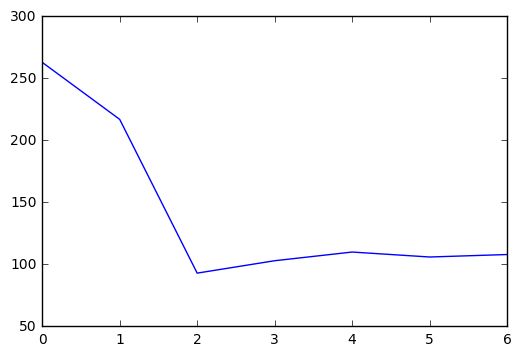

In [14]:
df.Opened.dt.weekday.value_counts().sort_index().plot()

In [15]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [16]:
df['Supervisor District'].value_counts().sort_index()



-1.0       1
 1.0      12
 2.0      23
 3.0      49
 4.0       2
 5.0      61
 6.0     352
 7.0       5
 8.0     132
 9.0     220
 10.0    139
 11.0      2
Name: Supervisor District, dtype: int64

In [17]:
df.Neighborhood.value_counts()

Mission                    221
South of Market            191
Showplace Square            68
Castro                      53
Civic Center                35
Potrero Hill                34
Mission Dolores             33
Mission Bay                 30
Rincon Hill                 28
South Beach                 27
Duboce Triangle             22
Financial District          18
Tenderloin                  17
Lower Haight                16
Lower Nob Hill              16
Marina                      14
Haight Ashbury              11
Produce Market              10
Silver Terrace              10
Apparel City                 9
Hayes Valley                 8
Bernal Heights               7
Central Waterfront           7
Western Addition             7
Northern Waterfront          6
Cathedral Hill               6
Inner Richmond               5
Outer Richmond               5
North Beach                  4
Eureka Valley                4
                          ... 
Japantown                    3
Inner Su

In [19]:
df[df.Neighborhood == 'Mission'].head(8)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
3,6602998,2016-12-06 21:38:45,NaT,2016-12-06 22:37:36,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"612 ALABAMA ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.760902390379, -122.412172459157)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5847a0593da19793c74c14da/report.jpg
11,6602707,2016-12-06 17:02:58,NaT,2016-12-06 17:02:58,Open,Open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 17TH ST and BRYANT ST,10.0,Mission,"(37.7643099589813, -122.410363805924)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58475fb93da19793c74c108f/photo_20161206_170244.jpg
13,6602645,2016-12-06 16:47:55,NaT,2016-12-06 16:47:55,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 13TH ST and HWY 101 S ON RAMP,9.0,Mission,"(37.769805495, -122.41812502)",Open311,NaN
14,6602532,2016-12-06 16:23:15,NaT,2016-12-06 16:23:15,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 16TH ST and FOLSOM ST,9.0,Mission,"(37.7653147489607, -122.415308353435)",Open311,NaN
15,6602510,2016-12-06 16:17:47,NaT,2016-12-06 16:17:47,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"298 ALABAMA ST, SAN FRANCISCO, CA, 94103",9.0,Mission,"(37.76576317037, -122.412789833467)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5847550a3da19793c74c0efb/report.jpg
19,6602309,2016-12-06 15:05:24,NaT,2016-12-06 15:07:20,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 15TH ST and CALEDONIA ST,9.0,Mission,"(37.7665704473143, -122.421531181949)",Voice In,NaN
20,6602273,2016-12-06 14:49:22,NaT,2016-12-06 16:14:00,Open,in progress,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"240 SHOTWELL ST, SAN FRANCISCO, CA, 94110",9.0,Mission,"(37.764751154394, -122.416438535593)",Web Self Service,NaN
23,6601922,2016-12-06 13:49:42,NaT,2016-12-06 13:49:42,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 16TH ST and FOLSOM ST,9.0,Mission,"(37.7653147489607, -122.415308353435)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/5847326b3da19793c74c06f1/report.jpg



### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 



In [24]:
hl_images = df[df['Media URL'].notnull() ]['Media URL']


In [25]:
#hl_images = df[df['Media URL'].notnull() ]

In [26]:
hl_images.head(4)

0                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5847bbab3da19793c74c16fb/report.jpg
2     http://mobile311.sfgov.org/media/san_francisco/report/photos/5847a4d03da19793c74c152f/photo_20161206_215729.jpg
3                    http://mobile311.sfgov.org/media/san_francisco/report/photos/5847a0593da19793c74c14da/report.jpg
10                   http://mobile311.sfgov.org/media/san_francisco/report/photos/58477b823da19793c74c12ed/report.jpg
Name: Media URL, dtype: object

http://mobile311.sfgov.org/media/san_francisco/report/photos/5847bbab3da19793c74c16fb/report.jpg


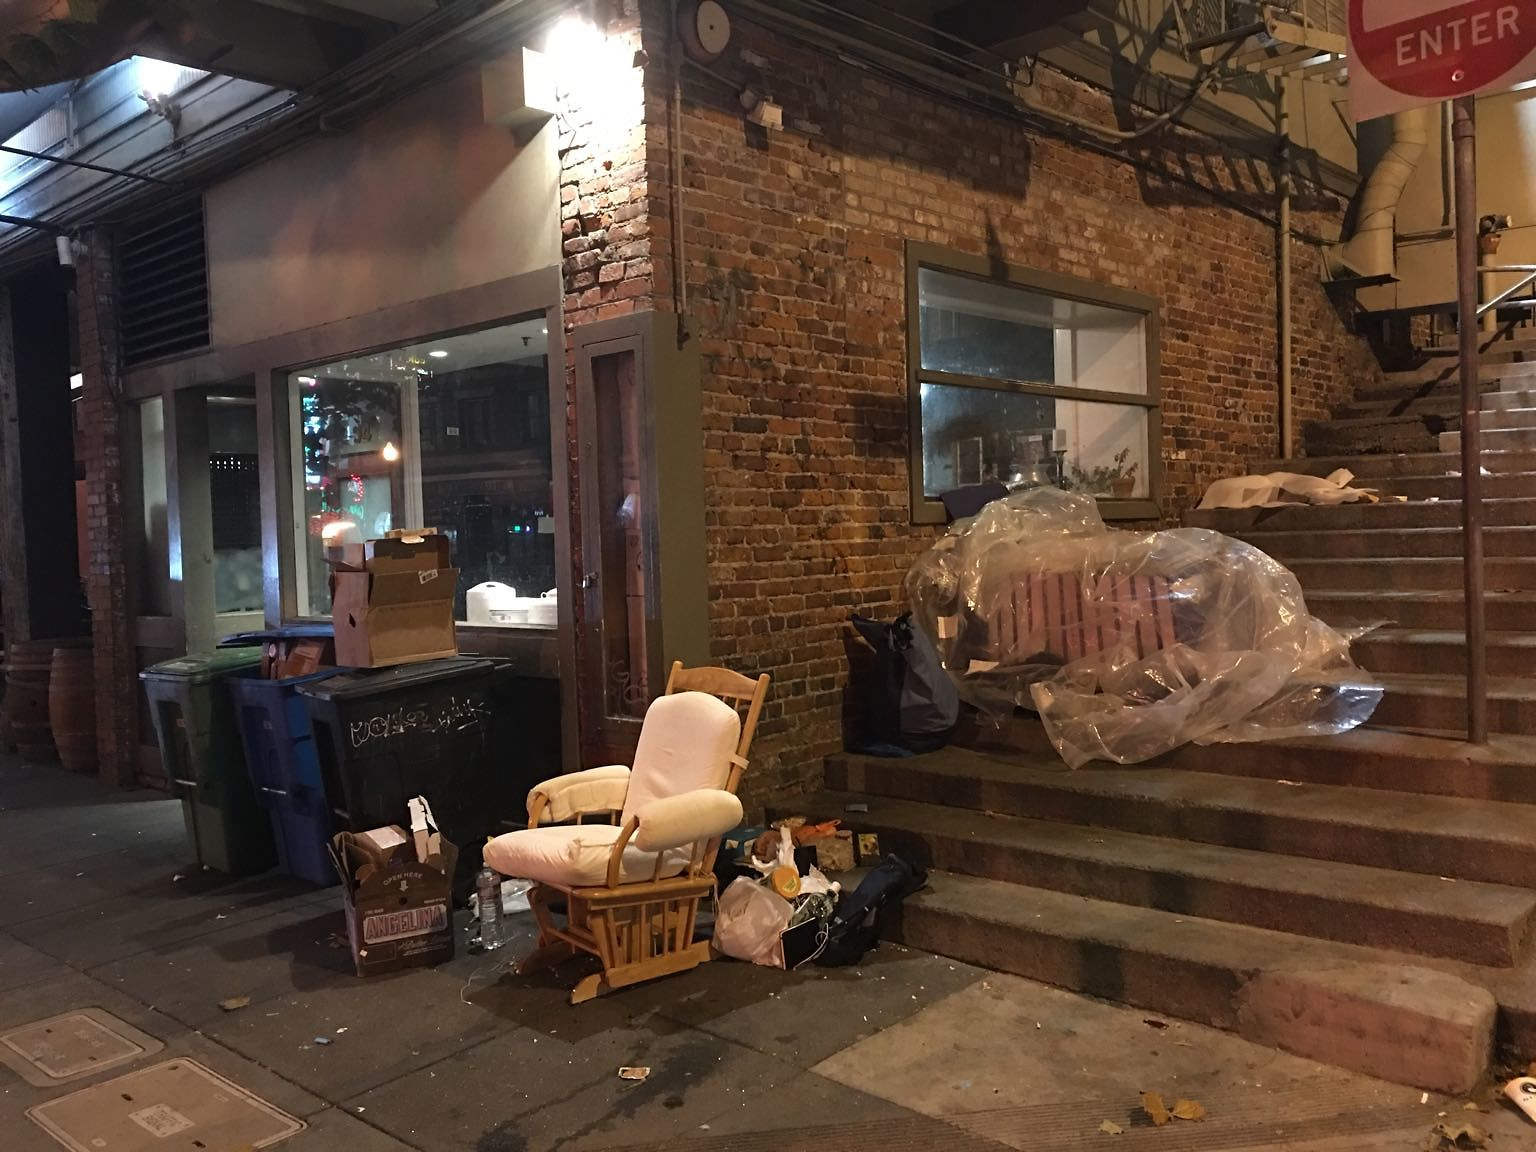

In [33]:
print(hl_images[0])
Image(hl_images[0])
